Mount drive where the "yolov12.pt" is downloaded

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Install dataset from Roboflow


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kM4NatSR5pDU6PLooG5n")
project = rf.workspace("sriwijaya-university-hivwu").project("tumor-otak-tbpou")
version = project.version(8)
dataset = version.download("yolov12")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tumor-otak-8 in yolov12:: 100%|██████████| 14716/14716 [00:02<00:00, 5798.44it/s] 


In [3]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [4]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['glioma', 'meningioma', 'pituitary']

roboflow:
  workspace: sriwijaya-university-hivwu
test: ../test/images
train: ../train/images
val: ../valid/images


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Fine-tune and train the YOLOv12 model on the train dataset

In [7]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/deep learning/yolov12m.pt')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=90)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tumor-otak-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=

100%|██████████| 755k/755k [00:00<00:00, 141MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2, 1, 2]         
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    147968  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2, 1, 4]        
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2689536  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 4]        
  7                  -1  1   2360320  ultralytics

  8                  -1  2   2689536  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 1]        
  9                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 10             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 11                  -1  1   1248768  ultralytics.nn.modules.block.A2C2f           [1024, 512, 1, False, -1]     
 12                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 13             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 14                  -1  1    378624  ultralytics.nn.modules.block.A2C2f           [1024, 256, 1, False, -1]     
 15                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 16            [-1, 11]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 271MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1777.5±1155.1 MB/s, size: 125.8 KB)


train: Scanning /content/tumor-otak-8/train/labels... 6432 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6432/6432 [00:04<00:00, 1385.00it/s]


train: New cache created: /content/tumor-otak-8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1030.2±503.8 MB/s, size: 30.0 KB)


val: Scanning /content/tumor-otak-8/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<00:00, 1219.68it/s]


val: New cache created: /content/tumor-otak-8/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 123 weight(decay=0.0), 130 weight(decay=0.0005), 129 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90        11G      1.795      2.883      1.749         27        640: 100%|██████████| 402/402 [03:39<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]


                   all        612        612      0.481      0.341      0.314      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      11.1G      1.812      2.328      1.781         17        640: 100%|██████████| 402/402 [03:35<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]

                   all        612        612       0.59      0.542       0.56      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      11.1G      1.784      2.177      1.735         32        640: 100%|██████████| 402/402 [03:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]

                   all        612        612      0.569      0.591      0.585      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      11.1G      1.726      2.019      1.693         31        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.704      0.661      0.712      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      11.1G      1.695      1.894      1.679         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        612        612       0.78      0.681      0.772      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      11.1G      1.645      1.772      1.635         33        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        612        612      0.631      0.548      0.602      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      11.1G      1.628      1.732      1.622         24        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.755      0.691      0.748      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      11.1G      1.606      1.662      1.595         26        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.777      0.727      0.788      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      11.1G      1.578      1.586      1.581         30        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.761      0.679      0.745      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      11.1G      1.568      1.597      1.575         28        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.779      0.704      0.768      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      11.1G      1.553      1.539       1.57         20        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612       0.77      0.784      0.819      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      11.1G      1.534      1.499      1.546         24        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.802      0.765      0.821      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      11.1G      1.541      1.475      1.549         22        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.807      0.772       0.83      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      11.1G       1.51      1.418      1.528         27        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.795      0.792      0.849      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      11.1G      1.497      1.393      1.514         27        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.845       0.74      0.816      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      11.1G      1.487      1.389      1.507         27        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.836      0.763      0.853      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      11.1G       1.49      1.373      1.511         14        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        612        612      0.769      0.784      0.851      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      11.1G      1.487      1.346        1.5         25        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.861      0.772      0.859      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      11.1G      1.479      1.324      1.498         31        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.859      0.793      0.871      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      11.1G      1.467      1.314      1.489         32        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.864      0.787      0.864      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      11.1G      1.471      1.286      1.499         29        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.765      0.845      0.876      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      11.1G      1.431       1.24       1.46         17        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.853      0.824      0.883      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      11.1G      1.437      1.218      1.466         35        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.861      0.808      0.876      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      11.1G      1.426      1.227      1.457         26        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.786      0.787      0.838      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      11.1G      1.407       1.19      1.459         31        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.871      0.824      0.893       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      11.1G      1.393      1.185      1.436         27        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.858      0.812      0.887      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      11.1G      1.393      1.175      1.435         29        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.848      0.823      0.881       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      11.1G      1.404      1.175      1.435         21        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.823       0.84      0.881      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      11.1G      1.396      1.147      1.442         31        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.878      0.834      0.899      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      11.1G      1.391      1.148      1.425         22        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.883       0.84      0.892      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      11.1G      1.375      1.126      1.415         30        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.834      0.864      0.907      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      11.1G      1.348      1.095      1.399         28        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.873       0.84      0.911      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      11.1G      1.354      1.076      1.406         28        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.901      0.839      0.915      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90      11.1G       1.38      1.104      1.428         24        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.886      0.853      0.917      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      11.1G      1.341      1.062      1.398         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.876      0.843      0.907      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      11.1G      1.347      1.063      1.408         20        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.918      0.852      0.921      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      11.1G      1.349      1.044      1.397         24        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.902      0.866      0.921      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      11.1G      1.336      1.055      1.395         28        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.885      0.852      0.912      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      11.1G      1.334      1.031      1.388         34        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        612        612      0.913      0.842      0.911      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      11.1G      1.319      1.024      1.381         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.918      0.842      0.915      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      11.1G       1.32      1.007      1.378         20        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.891      0.855      0.915      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      11.1G      1.304      1.003      1.372         32        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.889      0.871      0.917        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90      11.1G      1.309     0.9806      1.366         30        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612      0.887      0.879      0.919      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90      11.1G      1.305     0.9802      1.364         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        612        612       0.86      0.888      0.912      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      11.1G      1.303     0.9815      1.358         22        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.907       0.85      0.915      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      11.1G      1.289     0.9496      1.354         25        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.897      0.876      0.923      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      11.1G      1.273     0.9459      1.346         19        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.893      0.876       0.93      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      11.1G      1.261     0.9314      1.337         26        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.899      0.886      0.929      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      11.1G      1.283     0.9498      1.352         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.893      0.876      0.927      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      11.1G      1.266     0.9297      1.336         27        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.894      0.875       0.93      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      11.1G      1.261     0.9218      1.333         18        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.916      0.871      0.925      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      11.1G       1.24     0.8999      1.325         34        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.883       0.89      0.933      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/90      11.1G      1.243     0.8892       1.33         22        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.907      0.877       0.93      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/90      11.1G      1.223      0.873      1.301         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.923      0.884      0.941      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/90      11.1G      1.243     0.8809      1.314         21        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.942      0.862      0.941      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/90      11.1G      1.232     0.8872      1.316         27        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.914      0.883      0.941      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/90      11.1G      1.221     0.8733      1.318         21        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.909      0.875      0.933      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/90      11.1G      1.222     0.8561       1.31         25        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.894      0.886      0.932       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/90      11.1G      1.213     0.8506      1.305         29        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.949      0.859      0.935      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/90      11.1G      1.209       0.86      1.301         31        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612        0.9      0.896      0.937      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/90      11.1G      1.184     0.8278      1.283         22        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.937      0.867      0.935      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/90      11.1G      1.204      0.829      1.292         24        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.927      0.879      0.941      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/90      11.1G       1.21     0.8387        1.3         30        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.923      0.892      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/90      11.1G       1.17     0.7947      1.274         20        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.924      0.891      0.948       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/90      11.1G       1.17     0.7869      1.261         33        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.941       0.87      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/90      11.1G      1.183     0.8029      1.281         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.915      0.895      0.941      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/90      11.1G      1.174     0.7963      1.272         29        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.922      0.896      0.943      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/90      11.1G      1.166     0.7819      1.264         26        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.911      0.905      0.942      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/90      11.1G       1.17     0.7807      1.268         31        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.925      0.903      0.945      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/90      11.1G      1.146     0.7674      1.257         21        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.909        0.9      0.939      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/90      11.1G       1.14     0.7538      1.257         24        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.922      0.881      0.937      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/90      11.1G      1.141     0.7527      1.259         28        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.905      0.901      0.942      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/90      11.1G      1.154     0.7679      1.258         25        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.928      0.878      0.939      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/90      11.1G      1.131     0.7384      1.244         34        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.937      0.874      0.942      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/90      11.1G      1.124     0.7363      1.236         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.908      0.914      0.941      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/90      11.1G       1.12     0.7311      1.236         18        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.925      0.897      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/90      11.1G       1.12     0.7303      1.229         28        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.932      0.882       0.94      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/90      11.1G      1.116     0.7313      1.233         23        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.918      0.901      0.944      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/90      11.1G      1.103     0.7097      1.217         12        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.895      0.925      0.948      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/90      11.1G      1.111     0.7196      1.222         25        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.922      0.898      0.949      0.734


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/90      11.1G      1.076     0.6029      1.258         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612      0.938      0.886      0.951      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/90      11.1G      1.056     0.5719      1.243         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.914       0.91      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/90      11.1G      1.046      0.563      1.233         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.913      0.912       0.94      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/90      11.1G       1.04     0.5617      1.234         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.935      0.887      0.941      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/90      11.1G      1.024     0.5493      1.218         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.926      0.901      0.943      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/90      11.1G      1.019     0.5395      1.212         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.933      0.898      0.945      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/90      11.1G      1.016     0.5445      1.214         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        612        612      0.926      0.913       0.95      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      88/90      11.1G      1.012     0.5287      1.212         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        612        612       0.92      0.918      0.949       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      89/90      11.1G      1.005     0.5314      1.209         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.929      0.914      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      90/90      11.1G     0.9953     0.5205      1.201         16        640: 100%|██████████| 402/402 [03:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        612        612      0.927      0.908      0.948      0.736



90 epochs completed in 5.541 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 39.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 39.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv12m summary (fused): 169 layers, 19,627,993 parameters, 0 gradients, 59.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]


                   all        612        612      0.934      0.897      0.945      0.742
                glioma        285        285      0.865      0.812      0.877      0.602
            meningioma        142        142       0.98      0.951      0.984      0.854
             pituitary        185        185      0.956      0.929      0.974       0.77
Speed: 0.2ms preprocess, 8.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model.save('/content/runs/detect/train/weights/best.h5')

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['glioma', 'meningioma', 'pituitary']

In [8]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.9 MB/s eta 0:00:00


In [10]:
import supervision as sv

model = YOLO('/content/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

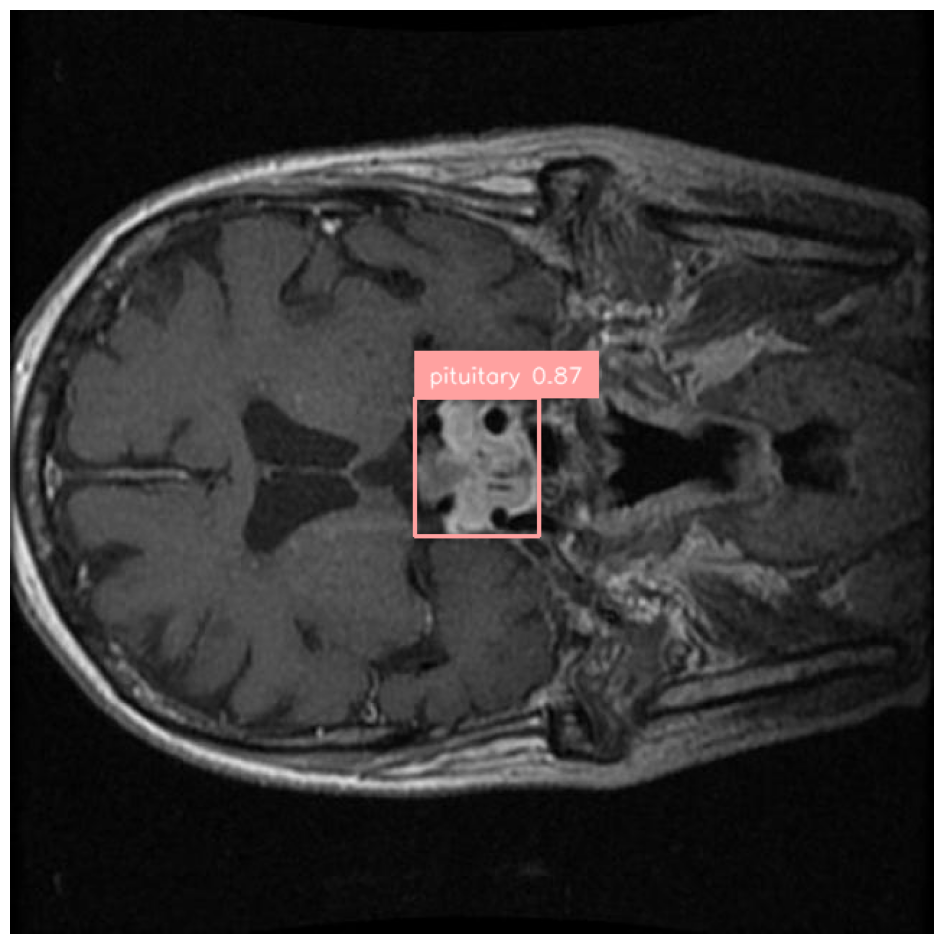

In [11]:
# Choose your own image path
image_path = '/content/tumor-otak-8/test/images/1090_jpg.rf.b31ea2a0a21d172db40f3a287b1d00f9.jpg' # <-- Change this to your actual image path

# Load the image manually using cv2 or PIL
import cv2
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Run detection
results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

# Create labels with confidence score
labels = [
    f"{results.names[class_id]} {conf:.2f}"
    for class_id, conf in zip(detections.class_id, detections.confidence)
]

# Annotators
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Annotate image
annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels
)

# Show the image
sv.plot_image(annotated_image)

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
YOLOv12 = "/content/runs/detect/train/weights/best.pt"

In [ ]:
import gradio as gr
import cv2
import tempfile
from ultralytics import YOLO

def yolov12_inference(image, video, model_id, image_size, conf_threshold):
    model = YOLO(model_id)
    if image:
        results = model.predict(source=image, imgsz=image_size, conf=conf_threshold)
        annotated_image = results[0].plot()
        return annotated_image[:, :, ::-1], None
    else:
        video_path = tempfile.mktemp(suffix=".webm")
        with open(video_path, "wb") as f:
            with open(video, "rb") as g:
                f.write(g.read())

        cap = cv2.VideoCapture(video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        output_video_path = tempfile.mktemp(suffix=".webm")
        out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'vp80'), fps, (frame_width, frame_height))

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            results = model.predict(source=frame, imgsz=image_size, conf=conf_threshold)
            annotated_frame = results[0].plot()
            out.write(annotated_frame)

        cap.release()
        out.release()

        return None, output_video_path

def yolov12_inference_for_examples(image, model_path, image_size, conf_threshold):
    annotated_image, _ = yolov12_inference(image, None, model_path, image_size, conf_threshold)
    return annotated_image

def app():
    with gr.Row():
        with gr.Column():
            image = gr.Image(type="pil", label="Image", visible=True)
            video = gr.Video(label="Video", visible=False)
            input_type = gr.Radio(
                choices=["Image", "Video"],
                value="Image",
                label="Input Type",
            )
            model_id = gr.Dropdown(
                label="Model",
                choices=[
                    ("YOLOv12", "weights/best.pt")
                ],
                value="weights/best.pt"

            )
            image_size = gr.Slider(
                label="Image Size",
                minimum=320,
                maximum=1280,
                step=32,
                value=640,
            )
            conf_threshold = gr.Slider(
                label="Confidence Threshold",
                minimum=0.0,
                maximum=1.0,
                step=0.05,
                value=0.25,
            )
            yolov12_infer = gr.Button(value="Detect Brain Tumors")

        with gr.Column():
            output_image = gr.Image(type="numpy", label="Annotated Image", visible=True)
            output_video = gr.Video(label="Annotated Video", visible=False)

    def update_visibility(input_type_value):
        image_update = gr.update(visible=True) if input_type_value == "Image" else gr.update(visible=False)
        video_update = gr.update(visible=False) if input_type_value == "Image" else gr.update(visible=True)
        output_image_update = gr.update(visible=True) if input_type_value == "Image" else gr.update(visible=False)
        output_video_update = gr.update(visible=False) if input_type_value == "Image" else gr.update(visible=True)

        return image_update, video_update, output_image_update, output_video_update

    input_type.change(
        fn=update_visibility,
        inputs=[input_type],
        outputs=[image, video, output_image, output_video],
    )

    def run_inference(image_input, video_input, model_id_input, image_size_input, conf_threshold_input, input_type_value):
        if input_type_value == "Image":
            return yolov12_inference(image_input, None, model_id_input, image_size_input, conf_threshold_input)
        else:
            return yolov12_inference(None, video_input, model_id_input, image_size_input, conf_threshold_input)

    yolov12_infer.click(
        fn=run_inference,
        inputs=[image, video, model_id, image_size, conf_threshold, input_type],
        outputs=[output_image, output_video],
    )

    # Update examples with brain tumor images if available
    gr.Examples(
        examples=[
            [
                "path_to_brain_tumor_example_image.jpg",  # Replace with actual example image path
               "/content/best.pt",
                640,
                0.25,
            ],
        ],
        fn=yolov12_inference_for_examples,
        inputs=[
            image,
            model_id,
            image_size,
            conf_threshold,
        ],
        outputs=[output_image],
        cache_examples='lazy',
    )

gradio_app = gr.Blocks()
with gradio_app:
    gr.HTML(
        """
    <h1 style='text-align: center'>
    Brain Tumor Detection with YOLOv12
    </h1>
    """
    )
    app()

if __name__ == '__main__':
    gradio_app.launch()

Will cache examples in '/content/.gradio/cached_examples/67' directory at first use.

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://212d5f11d7a30aed6e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
